In [13]:
import warnings

import cirq
import numpy as np
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit
from bloqade.cirq_utils import noise, transpile, load_circuit

warnings.filterwarnings("ignore")

In [14]:
def ghz_circuit(n: int) -> cirq.Circuit:
    qubits = cirq.LineQubit.range(n)

    # Step 1: Hadamard on the first qubit
    circuit = cirq.Circuit(cirq.H(qubits[0]))

    # Step 2: CNOT chain from qubit i to i+1
    for i in range(n - 1):
        circuit.append(cirq.CNOT(qubits[i], qubits[i + 1]))

    return circuit

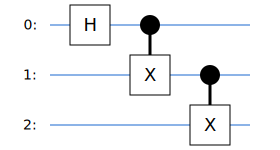

In [15]:
ghz_circuit_3 = ghz_circuit(3)
SVGCircuit(ghz_circuit_3)

In [84]:
def MSDPrep6Qubit(circuit: cirq.Circuit, qubits: list[cirq.LineQubit], arbitrary_state_qubit: int) -> cirq.Circuit:
    """
    Preps the MSD encoding given an arbitrary state
    """

    n_qubits = len(qubits)
    y_sqrt_invs = cirq.inverse(cirq.Y ** 0.5)

    ancillas = [cirq.LineQubit(i + max(q.x for q in qubits) + 1) for i in range(6)]
    qubits = qubits + ancillas

    # Step 1: apply $\sqrt{Y}^{\dagger}$ (abbr to P):
    for i in range(n_qubits, n_qubits + 6):
        circuit.append(y_sqrt_invs(qubits[i]))
    
    # Step 2: apply first layer of CZs:
    circuit.append(cirq.CZ(qubits[arbitrary_state_qubit], qubits[n_qubits]))
    circuit.append(cirq.CZ(qubits[n_qubits + 1], qubits[n_qubits + 2]))
    circuit.append(cirq.CZ(qubits[n_qubits + 3], qubits[n_qubits + 4]))

    # Step 3: apply P to qubit 0:
    circuit.append(y_sqrt_invs(qubits[arbitrary_state_qubit]))

    # Step 4: CZ (6, 3), (4, 1), (2, 0)
    circuit.append(cirq.CZ(qubits[n_qubits + 5], qubits[n_qubits + 2]))
    circuit.append(cirq.CZ(qubits[n_qubits + 3], qubits[n_qubits ]))
    circuit.append(cirq.CZ(qubits[n_qubits + 1], qubits[arbitrary_state_qubit]))

    # circuit.append(cirq)

    # Step 5: apply P's to qubits 1-4 and state qubit
    circuit.append(y_sqrt_invs(qubits[arbitrary_state_qubit]))
    for i in range(n_qubits, n_qubits + 4):
        circuit.append(y_sqrt_invs(qubits[i]))

    # Step 6: apply second layer of CZs:
    circuit.append(cirq.CZ(qubits[n_qubits + 5], qubits[n_qubits + 4]))
    circuit.append(cirq.CZ(qubits[n_qubits + 3], qubits[n_qubits + 2]))
    circuit.append(cirq.CZ(qubits[n_qubits + 1], qubits[n_qubits]))

    # Step 7: apply last set of P
    circuit.append(y_sqrt_invs(qubits[n_qubits + 4]))
    circuit.append(y_sqrt_invs(qubits[n_qubits + 3]))
    circuit.append(y_sqrt_invs(qubits[n_qubits + 1]))

    return circuit

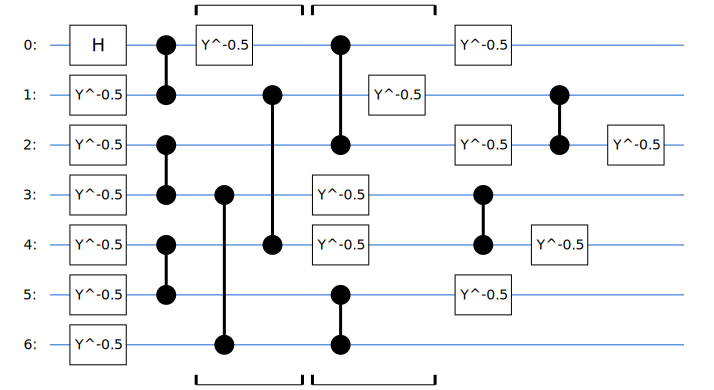

In [90]:
qubits = cirq.LineQubit.range(1)
circuit1 = MSDPrep6Qubit(cirq.Circuit(cirq.H(qubits[0])), qubits, 0)
display(SVGCircuit(circuit1))